In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [6]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as n

In [36]:
w = ['NORMAL', 0.25, 0.025]
P = ['NORMAL', 10.2, 1.12]
Fy = ['NORMAL', 40.3, 4.64]
POP = [10000]

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 1,
        'D': 3,
        'VARS': [w, P, Fy],
        'MODEL': 'MCS'}

In [37]:
def OBJ(X):
    w = X[0]
    P = X[1]
    Fy = X[2]
    

    # STATE LIMIT FUNCTION
    
    R_0 = 80 * Fy
    S_0 = 54 * P + 5832 * w
    G_0 = S_0 - R_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]


    return R, S, G

In [38]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [39]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.272521,9.582935,40.703030,3256.242397,2106.820662,-1149.421735,0.0
1,0.292102,9.432674,41.889707,3351.176550,2212.905513,-1138.271037,0.0
2,0.253504,8.367000,44.034110,3522.728774,1930.253961,-1592.474814,0.0
3,0.258557,9.576463,36.132423,2890.593875,2025.033734,-865.560141,0.0
4,0.261010,10.110008,46.039597,3683.167742,2068.150656,-1615.017086,0.0
...,...,...,...,...,...,...,...
9995,0.290459,9.327773,35.569446,2845.555700,2197.655952,-647.899748,0.0
9996,0.244658,9.227486,47.298766,3783.901303,1925.128324,-1858.772980,0.0
9997,0.222989,10.722761,43.601636,3488.130843,1879.503671,-1608.627171,0.0
9998,0.261058,10.413127,39.004027,3120.322175,2084.797058,-1035.525117,0.0


In [40]:
RESULTS_TEST

[{'TOTAL RESULTS':            X_0        X_1        X_2          R_0          S_0          G_0  \
  0     0.272521   9.582935  40.703030  3256.242397  2106.820662 -1149.421735   
  1     0.292102   9.432674  41.889707  3351.176550  2212.905513 -1138.271037   
  2     0.253504   8.367000  44.034110  3522.728774  1930.253961 -1592.474814   
  3     0.258557   9.576463  36.132423  2890.593875  2025.033734  -865.560141   
  4     0.261010  10.110008  46.039597  3683.167742  2068.150656 -1615.017086   
  ...        ...        ...        ...          ...          ...          ...   
  9995  0.290459   9.327773  35.569446  2845.555700  2197.655952  -647.899748   
  9996  0.244658   9.227486  47.298766  3783.901303  1925.128324 -1858.772980   
  9997  0.222989  10.722761  43.601636  3488.130843  1879.503671 -1608.627171   
  9998  0.261058  10.413127  39.004027  3120.322175  2084.797058 -1035.525117   
  9999  0.239804  10.649001  40.070060  3205.604768  1973.583826 -1232.020942   
  
        

In [41]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.272521,9.582935,40.703030,3256.242397,2106.820662,-1149.421735,0.0
1,0.292102,9.432674,41.889707,3351.176550,2212.905513,-1138.271037,0.0
2,0.253504,8.367000,44.034110,3522.728774,1930.253961,-1592.474814,0.0
3,0.258557,9.576463,36.132423,2890.593875,2025.033734,-865.560141,0.0
4,0.261010,10.110008,46.039597,3683.167742,2068.150656,-1615.017086,0.0
...,...,...,...,...,...,...,...
9995,0.290459,9.327773,35.569446,2845.555700,2197.655952,-647.899748,0.0
9996,0.244658,9.227486,47.298766,3783.901303,1925.128324,-1858.772980,0.0
9997,0.222989,10.722761,43.601636,3488.130843,1879.503671,-1608.627171,0.0
9998,0.261058,10.413127,39.004027,3120.322175,2084.797058,-1035.525117,0.0


In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)

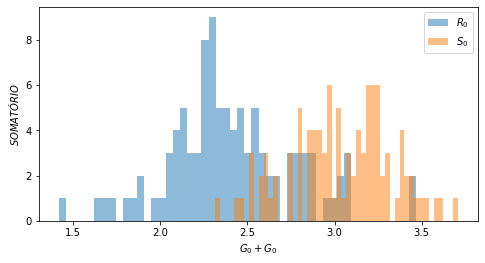

In [8]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0 + G_0$',
                    'Y AXIS LABEL': '$SOMATÓRIO$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

In [42]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.272521,9.582935,40.703030,3256.242397,2106.820662,-1149.421735,0.0
1,0.292102,9.432674,41.889707,3351.176550,2212.905513,-1138.271037,0.0
2,0.253504,8.367000,44.034110,3522.728774,1930.253961,-1592.474814,0.0
3,0.258557,9.576463,36.132423,2890.593875,2025.033734,-865.560141,0.0
4,0.261010,10.110008,46.039597,3683.167742,2068.150656,-1615.017086,0.0
...,...,...,...,...,...,...,...
9995,0.290459,9.327773,35.569446,2845.555700,2197.655952,-647.899748,0.0
9996,0.244658,9.227486,47.298766,3783.901303,1925.128324,-1858.772980,0.0
9997,0.222989,10.722761,43.601636,3488.130843,1879.503671,-1608.627171,0.0
9998,0.261058,10.413127,39.004027,3120.322175,2084.797058,-1035.525117,0.0


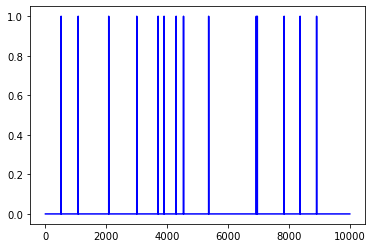

In [43]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

10000

In [33]:
RESULTS_TEST[0]['Address'] = (RESULTS_TEST[0]['TOTAL RESULTS'])

In [35]:
RESULTS_TEST[0]

{'TOTAL RESULTS':            X_0        X_1        X_2          R_0          S_0          G_0  \
 0     0.270140  10.236145  32.425446  2594.035699  2128.207333  -465.828366   
 1     0.256170  12.551301  39.541318  3163.305449  2171.756110  -991.549340   
 2     0.247581  10.647450  37.619566  3009.565266  2018.857419  -990.707848   
 3     0.283718  10.704818  35.346717  2827.737349  2232.706242  -595.031108   
 4     0.248217   9.518946  44.448118  3555.849408  1961.626111 -1594.223296   
 ...        ...        ...        ...          ...          ...          ...   
 9995  0.236104   9.020226  39.842835  3187.426819  1864.052707 -1323.374112   
 9996  0.251300  10.803425  31.956518  2556.521450  2048.968599  -507.552851   
 9997  0.239057  10.611252  39.714220  3177.137626  1967.187451 -1209.950175   
 9998  0.268105  12.085393  41.329567  3306.365382  2216.198666 -1090.166716   
 9999  0.228182  10.025755  40.270174  3221.613953  1872.146715 -1349.467238   
 
       I_0  
 0     0

In [72]:
RESULTS_TEST[0]['TOTAL RESULTS']['I_0'].head(10000).sum()

14.0

In [88]:
Bf = [ ]
Af = [ ]
c = 500
for i in range(0, 10000):
   Af.append((RESULTS_TEST[0]['TOTAL RESULTS']['I_0'].head(i).sum())/10000) # soma valores anteriores e calcula PF

df = pd.DataFrame(Af,columns=['Pf']) #converte para DF

for i in range(0, 10000, c): #Salva os valores em um DF a cada 'c' valores
     Bf.append(Af[i])

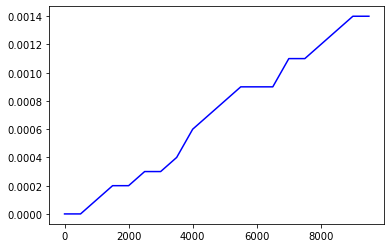

In [89]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']),c)), Bf, color='blue')

In [ ]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')